In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('detail_transaksi.xlsx')

In [3]:
#Filter rows where KOMISI = ST AND PAYMENT_STATUS = PAID
flt = df[(df['KOMISI']=='ST') & (df['PAYMENT_STATUS']== 'PAID')]

In [4]:
# Group by TERM_PAYMENT and count unique accounts [CUST_ACCT]
Total_new_accounts = flt.groupby('TERM PAYMENT')['CUST_ACCT'].nunique().reset_index()

In [5]:
# Define the correct order of the months
month_order = ['JAN','FEB','MAR','APR','MEI', 'JUNE','JULY','AUG','SEP','OKT','NOV','DEC']

In [6]:
# Ensure 'TERM PAYMENT' is the categorically correct order
Total_new_accounts['TERM PAYMENT'] = pd.Categorical(Total_new_accounts['TERM PAYMENT'],categories = month_order,ordered=True)

In [7]:
# Sorting by month order
Total_new_accounts = Total_new_accounts.sort_values('TERM PAYMENT')

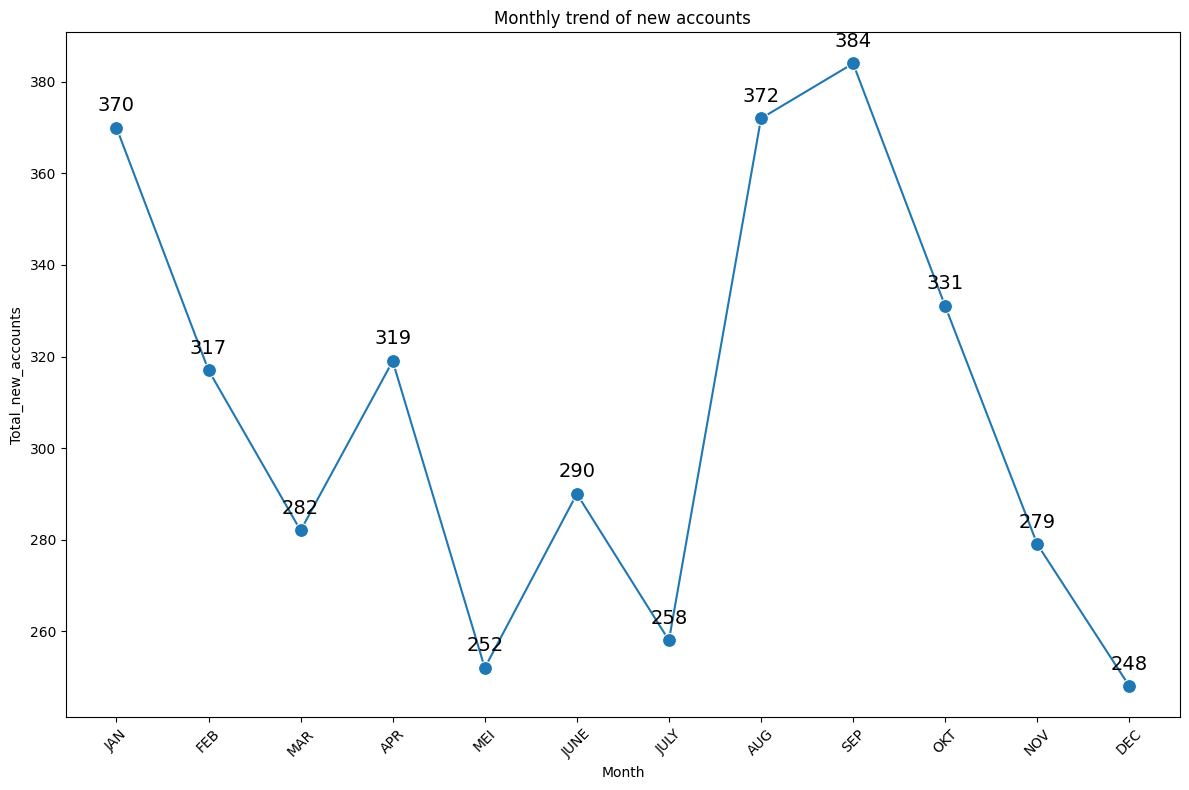

In [8]:
# Line plotting
#Total_new_acconts = pd.DataFrame({'TERM PAYMENT','CUST_ACCT'})
plt.figure(figsize=(12,8))
sns.lineplot(data=Total_new_accounts, x='TERM PAYMENT', y='CUST_ACCT',marker='o',markersize=10)
plt.title('Monthly trend of new accounts')
plt.xlabel('Month')
plt.ylabel('Total_new_accounts')

plt.xticks(rotation=45)
plt.tight_layout()

# adding numbered label in each marker
for i, row in Total_new_accounts.iterrows():
  plt.annotate(f'{row.CUST_ACCT}',
               (row['TERM PAYMENT'], row.CUST_ACCT),
               textcoords='offset points',
               xytext=(0,12), #label's position is above the dot
               ha='center',
               fontsize=14)
plt.show()